In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
import seaborn as sns
from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
'''try:

  from google.colab import files
  uploaded = files.upload()

except:

  pass'''

Saving sentiment_analysis.csv to sentiment_analysis.csv


In [ ]:
'''try:

  from google.colab import files
  uploaded = files.upload()

except:

  pass'''

Saving Canadian_elections_2021.csv to Canadian_elections_2021.csv


In [ ]:
df1 = pd.read_csv('sentiment_analysis.csv')
df2 = pd.read_csv('Canadian_elections_2021.csv')

# **1. Data cleaning**


*   All emojis were removed
*   All URLs were removed.

*   All characters in the text are in lowercase.
*   All stop words are removed.

*   All punctuations are removed.


In [ ]:
def preProcessData(df):

  def remove_emojis(x):


    emoji_pattern = re.compile("["

        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', x)

  
  def remove_url(x):
    return re.sub('http[s]?://\S+', '', x)

 
  def to_lowercase(x):
    return x.lower()

  
  def remove_stopwords(x):
    x = x.split()
    x = ' '.join([i for i in x if i not in STOPWORDS])
    return x
  
  def remove_punc(x):
    return re.sub(r'[^\w\s]', '', x)
  
  def remove_spaces(x):
    return re.sub("\s+"," ", x)

  df.loc[:, 'noemoji'] = df.text.apply(remove_emojis)
  df.loc[:, 'no_url'] = df.noemoji.apply(remove_url)
  df.loc[:, 'lowercase'] = df.no_url.apply(to_lowercase)
  df.loc[:, 'no_stopwords'] = df.lowercase.apply(remove_stopwords)
  df.loc[:, "no_punc"] = df.no_stopwords.apply(remove_punc)
  df.loc[:, "no_spaces"] = df.no_punc.apply(remove_spaces)
  
  return df
  # We create a sample of the data after each operation so that we can retrieve any one of them for analysis.

In [ ]:
ab = preProcessData(df1)
ab.head()

,ID,text,label,noemoji,no_url,lowercase,no_stopwords,no_punc,no_spaces
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT @MianUsmanJaved: Congratulations Pakistan o...,rt @mianusmanjaved: congratulations pakistan o...,rt @mianusmanjaved: congratulations pakistan b...,rt mianusmanjaved congratulations pakistan bec...,rt mianusmanjaved congratulations pakistan bec...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...","RT @PEPalerts: This September, @YESmag is taki...","rt @pepalerts: this september, @yesmag is taki...","rt @pepalerts: september, @yesmag taking maine...",rt pepalerts september yesmag taking maine men...,rt pepalerts september yesmag taking maine men...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...","RT @david_gaibis: Newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...",rt david_gaibis newly painted walls thanks mil...,rt david_gaibis newly painted walls thanks mil...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT @CedricFeschotte: Excited to announce: as o...,rt @cedricfeschotte: excited to announce: as o...,rt @cedricfeschotte: excited announce: july 20...,rt cedricfeschotte excited announce july 2017 ...,rt cedricfeschotte excited announce july 2017 ...


In [ ]:
b = preProcessData(df2)
b.shape

(1002, 9)

In [ ]:
# ab is general tweets data
# b is canadian elections data

# **2.Exploratory analysis**

We count the frequency of words belonging to a particular political party in a tweet and our prediction of the party is the one that occurs most in that tweet.

In [ ]:
# We create a list of keywords for each partyby going through the data we have
liberal = ['liberal','liberal party canada','justintrudeau','liberal_party','justin','trudeau']
conservative = ['conservative','conservative party canada','candice bergen','cpc_hq','candice','bergen']
ndp = ['ndp','thejagmeetsingh','new democratic party','jagmeet', 'singh']
ppc = ['ppc', 'peoples party canada','maxime bernier','peoplespca','maxime','bernier']

In [ ]:
# EDA for Canadian elections file
for idx, _ in b.iterrows():
  tweet = b.loc[idx,"no_spaces"]
  liberal_count = sum([True if x in tweet else False for x in liberal])
  conservative_count = sum([True if x in tweet else False for x in conservative])
  ndp_count = sum([True if x in tweet else False for x in ndp])
  ppc_count = sum([True if x in tweet else False for x in ppc])

  b.loc[idx, 'liberal'] = liberal_count
  b.loc[idx, 'conservative'] = conservative_count
  b.loc[idx, 'ndp'] = ndp_count
  b.loc[idx, 'ppc'] = ppc_count
  
b.loc[:,'political_party'] = b.loc[:,["liberal","conservative","ndp","ppc"]].idxmax(axis=1)
s =b.loc[:,["liberal","conservative","ndp","ppc"]].sum(axis = 1)
j =0 
for i in s:  
 if i == 0:
   b.loc[j,'political_party'] =None 
 if i == 1 and b.loc[i,'sentiment'] == 'negative':
   b.loc[j,'political_party'] =None  
 j=j+1

 
# logic for the above procedure being that if we have only name of one party with sentiment = negetive, it will be marked as none,
# but in case we have multiple parties in a tweet, we can't tell which party it is negetive for, so we will predict the most frequent party as the positive sentiment

In [ ]:
b.head()

,text,sentiment,negative_reason,noemoji,no_url,lowercase,no_stopwords,no_punc,no_spaces,liberal,conservative,ndp,ppc,political_party
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,The Canadian election is a power grab by PM Tr...,The Canadian election is a power grab by PM Tr...,the canadian election is a power grab by pm tr...,"canadian election power grab pm trudeau, yes -...",canadian election power grab pm trudeau yes t...,canadian election power grab pm trudeau yes ta...,1.0,0.0,0.0,0.0,None
1,I do hope Trudeau loses the Canadian election ...,negative,covid,I do hope Trudeau loses the Canadian election ...,I do hope Trudeau loses the Canadian election ...,i do hope trudeau loses the canadian election ...,hope trudeau loses canadian election tomorrow ...,hope trudeau loses canadian election tomorrow ...,hope trudeau loses canadian election tomorrow ...,1.0,0.0,0.0,0.0,None
2,"Dear Canadians, This election is a test of how...",positive,NaN,"Dear Canadians, This election is a test of how...","Dear Canadians, This election is a test of how...","dear canadians, this election is a test of how...","dear canadians, election test progressive are....",dear canadians election test progressive are w...,dear canadians election test progressive are w...,0.0,0.0,0.0,0.0,None
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,Canadian friends: Never forget that Trudeau ha...,Canadian friends: Never forget that Trudeau ha...,canadian friends: never forget that trudeau ha...,canadian friends: never forget trudeau 2 years...,canadian friends never forget trudeau 2 years ...,canadian friends never forget trudeau 2 years ...,1.0,0.0,0.0,0.0,None
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,Sorry @theJagmeetSingh I have voted #NDP all m...,Sorry @theJagmeetSingh I have voted #NDP all m...,sorry @thejagmeetsingh i have voted #ndp all m...,sorry @thejagmeetsingh voted #ndp life electio...,sorry thejagmeetsingh voted ndp life election ...,sorry thejagmeetsingh voted ndp life election ...,0.0,0.0,4.0,4.0,ndp


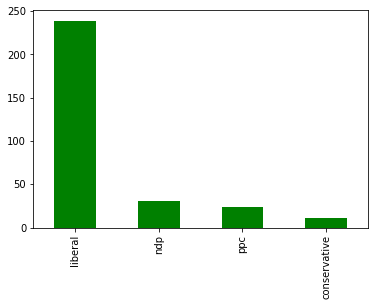

In [ ]:
#We plot the number of times any political party was mentioned in the data

b.political_party.value_counts().plot(kind = 'bar',color = 'g')

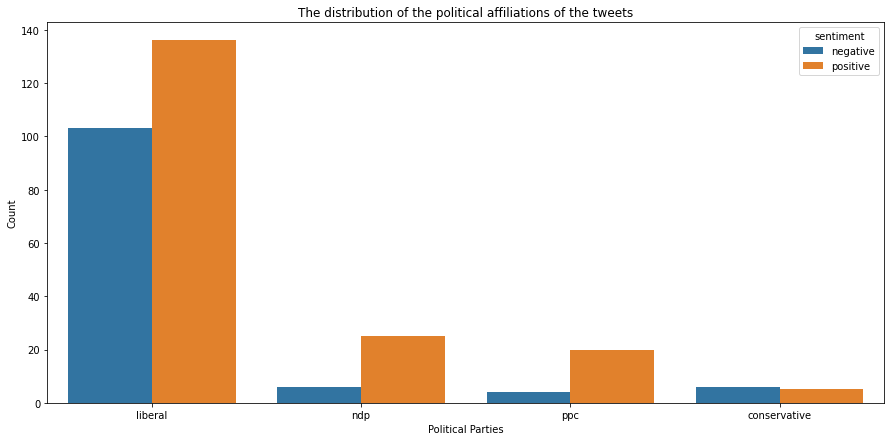

In [ ]:
# Here we plot the frequency of the tweets and their sentiments as well
plt.figure(figsize=(15,7))

ax = sns.countplot(x='political_party',data=b ,hue = 'sentiment', order = b.political_party.value_counts().index)

ax.axes.set_title('The distribution of the political affiliations of the tweets')

ax.set_xlabel('Political Parties')

ax.set_ylabel('Count')

plt.show()

**From the above graph, we can see that liberal party was the most talked about party regardless of the sentiment. All parties except the conservative party have a higher number of positive tweets compared to negative tweets.**

In [ ]:
# EDA for sentiment analysis file
ab.head()


,ID,text,label,noemoji,no_url,lowercase,no_stopwords,no_punc,no_spaces
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...,josh jenkins looking forward tab breeders crow...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT @MianUsmanJaved: Congratulations Pakistan o...,rt @mianusmanjaved: congratulations pakistan o...,rt @mianusmanjaved: congratulations pakistan b...,rt mianusmanjaved congratulations pakistan bec...,rt mianusmanjaved congratulations pakistan bec...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...","RT @PEPalerts: This September, @YESmag is taki...","rt @pepalerts: this september, @yesmag is taki...","rt @pepalerts: september, @yesmag taking maine...",rt pepalerts september yesmag taking maine men...,rt pepalerts september yesmag taking maine men...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...","RT @david_gaibis: Newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...","rt @david_gaibis: newly painted walls, thanks ...",rt david_gaibis newly painted walls thanks mil...,rt david_gaibis newly painted walls thanks mil...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT @CedricFeschotte: Excited to announce: as o...,rt @cedricfeschotte: excited to announce: as o...,rt @cedricfeschotte: excited announce: july 20...,rt cedricfeschotte excited announce july 2017 ...,rt cedricfeschotte excited announce july 2017 ...


In [ ]:
# We will create a word cloud for the sentiment analysis data
Positive_tweets = ab[ab['label'] == 1]

positive = ''

for line in Positive_tweets['no_spaces']:

    positive = positive + " ".join(line.split())

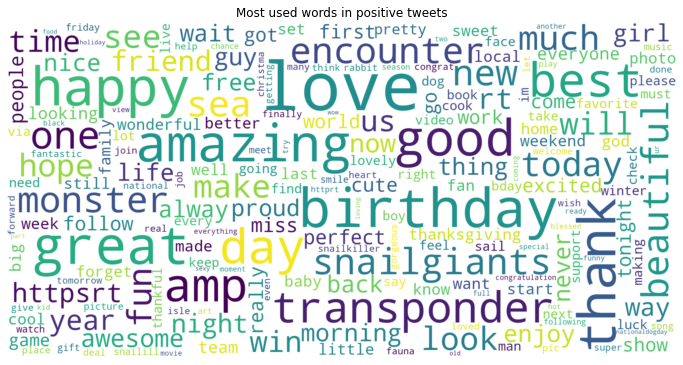

In [ ]:

wordcloud = WordCloud(width=2000, height=1000,max_font_size=200,collocations=False, background_color = 'white').generate(positive)

plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation="bilinear")

plt.title('Most used words in positive tweets')

plt.axis("off")

plt.show()

# **DIscuss your findings**

# **3.Sentiment Classification - Model implementation and tuning**

**a) Machine learning models:**

In [ ]:
sentiment_df = ab.loc[:,["no_spaces" ,"label"]]
sentiment_df

,no_spaces,label
0,josh jenkins looking forward tab breeders crow...,1
1,rt mianusmanjaved congratulations pakistan bec...,1
2,rt pepalerts september yesmag taking maine men...,1
3,rt david_gaibis newly painted walls thanks mil...,1
4,rt cedricfeschotte excited announce july 2017 ...,1
...,...,...
550386,goddesses_o stop watching hermm more,0
550387,poor old tom odell look know wrong crowd,0
550388,antsmasher smashed 7 ants awesome gamehjfjfi,1
550389,lizhudston kymwyllie evasmiless meanbok linddy...,1


In [ ]:
X = sentiment_df.loc[:,"no_spaces"]
y = sentiment_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)
feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectors_train.shape

(440312, 5000)

In [ ]:
X_train = vectors_train
X_test = vectors_test


In [ ]:
X_train.shape
X_test.shape

(110079, 5000)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train accuracy: 0.9679136612220426
Test accuracy: 0.965988063118306


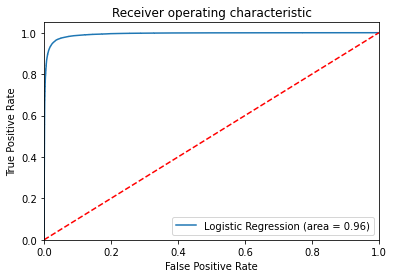

In [ ]:
# LOGISTIC REGRESSION

clf = LogisticRegression(C=1).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#KNN

clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

# predict on train and test set
y_train_predict_knn = clf_knn.predict(X_train)
y_test_predict_knn = clf_knn.predict(X_test)

# calculate train and test accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_predict_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_predict_knn)

# report results
print("Train accuracy knn: {}".format(train_accuracy_knn))
print("Test accuracy knn: {}".format(test_accuracy_knn))

Train accuracy knn: 0.7847866967059721
Test accuracy knn: 0.7540675333169814


In [ ]:
# Naive Bayes

gnb = MultinomialNB().fit(X_train, y_train)

# predict on train and test set
y_train_predict_nb = gnb.predict(X_train)
y_test_predict_nb = gnb.predict(X_test)

# calculate train and test accuracy
train_accuracy_nb = accuracy_score(y_train, y_train_predict_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_predict_nb)

# report results
print("Train accuracy Naive Bayes: {}".format(train_accuracy_nb))
print("Test accuracy Naive Bayes: {}".format(test_accuracy_nb))

Train accuracy Naive Bayes: 0.9283576191427897
Test accuracy Naive Bayes: 0.9254807910682328


In [ ]:
#SVM

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# predict on train and test set
y_train_predict_svm = clf.predict(X_train)
y_test_predict_svm = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_predict_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_predict_svm)

# report results
print("Train accuracy SVM: {}".format(train_accuracy_svm))
print("Test accuracy SVM: {}".format(test_accuracy_svm))

Train accuracy SVM: 0.9688561747124766
Test accuracy SVM: 0.9653703249484461


In [ ]:
#Decision Tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# predict on train and test set
y_train_predict_dt = clf.predict(X_train)
y_test_predict_dt = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_predict_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_predict_dt)

# report results
print("Train accuracy Decision Tree: {}".format(train_accuracy_dt))
print("Test accuracy Decision Tree: {}".format(test_accuracy_dt))

Train accuracy Decision Tree: 0.9976789185850033
Test accuracy Decision Tree: 0.9402974227600178


In [ ]:
#Random Forest
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# predict on train and test set
y_train_predict_rf = clf.predict(X_train)
y_test_predict_rf = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_predict_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_predict_rf)

# report results
print("Train accuracy Random Forest: {}".format(train_accuracy_rf))
print("Test accuracy Random Forest: {}".format(test_accuracy_rf))

Train accuracy Random Forest: 0.6747896945802068
Test accuracy Random Forest: 0.6742702967868531


In [ ]:
#XGboost
xgb_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,

                max_depth = 150, alpha = 10, n_estimators = 10)

xgb_class.fit(X_train,y_train)



# predict using train data

y_train_predict_xg = xgb_class.predict(X_train)

train_accuracy_xg = accuracy_score(y_train, y_train_predict_xg)



# predict using test data

y_test_predict_xg = xgb_class.predict(X_test)

test_accuracy_xg = accuracy_score(y_test, y_test_predict_xg)   



print("Model: XGBoost")

print("Training accuracy: {}".format(train_accuracy_xg))

print("Test accuracy: {}".format(test_accuracy_xg))

Model: XGBoost
Training accuracy: 0.9125483747887861
Test accuracy: 0.8927588368353637


**b) Deep learning model:**

In [ ]:
x1, x_test, y1, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x1,y1,test_size = 0.25,train_size =0.75)

In [ ]:
# Bag of Words
vectorizer = CountVectorizer(max_features = 3000)

X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)
X_val = vectorizer.transform(x_val)

#X_train = pd.DataFrame(vector_train.toarray(),columns=vectorizer.get_feature_names())
#X_test = pd.DataFrame(vector_test.toarray(),columns=vectorizer.get_feature_names())
#X_val = pd.DataFrame(vector_test.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
X_val.shape

(110078, 3000)

In [ ]:
X_train.shape

(330234, 3000)

In [ ]:
X_train.shape

(330234, 5000)

In [ ]:
round(X_train.shape[0] / 2, 0)

165117.0

In [ ]:
#EXPLAIN TAKING 3000 FEATURES 

In [ ]:
import time
def make_torch_array_from_csr_matrix(csr_matrix, compute_batch_size = 3000):
  torch_array = None
  temp_array = None
  for i in range(0, csr_matrix.shape[0], compute_batch_size):
    ii = torch.from_numpy(csr_matrix[i: i+compute_batch_size].todense()).float()
    temp_array = torch.cat([temp_array , ii]) if temp_array is not None else ii
    #print(temp_array.shape)
    ten_times_compute_batch_size = 10 * compute_batch_size
    if temp_array.shape[0]%ten_times_compute_batch_size==0:
      time.sleep(2)
      torch_array = torch.cat([torch_array , temp_array]) if torch_array is not None else temp_array
      temp_array = None
      print("Torch array shape: ", torch_array.shape)
  torch_array = torch.cat([torch_array , temp_array]) if torch_array is not None else temp_array
  return torch_array

x_train_size = int(round(X_train.shape[0] / 2, 0))
x_train_torch_array_1 = make_torch_array_from_csr_matrix(X_train[:x_train_size])
x_train_torch_array_2 = make_torch_array_from_csr_matrix(X_train[x_train_size:])
x_val_torch_array = make_torch_array_from_csr_matrix(X_val)
x_test_torch_array = make_torch_array_from_csr_matrix(X_test)

Torch array shape:  torch.Size([30000, 3000])
Torch array shape:  torch.Size([60000, 3000])
Torch array shape:  torch.Size([90000, 3000])
Torch array shape:  torch.Size([120000, 3000])
Torch array shape:  torch.Size([150000, 3000])
Torch array shape:  torch.Size([30000, 3000])
Torch array shape:  torch.Size([60000, 3000])
Torch array shape:  torch.Size([90000, 3000])
Torch array shape:  torch.Size([120000, 3000])
Torch array shape:  torch.Size([150000, 3000])
Torch array shape:  torch.Size([30000, 3000])
Torch array shape:  torch.Size([60000, 3000])
Torch array shape:  torch.Size([90000, 3000])
Torch array shape:  torch.Size([30000, 3000])
Torch array shape:  torch.Size([60000, 3000])
Torch array shape:  torch.Size([90000, 3000])


In [ ]:
#x_train_torch_array = torch.cat([x_train_torch_array_1, x_train_torch_array_2])
#x_train_torch_array.shape
#X_train.shape
x_val_torch_array.shape

torch.Size([110078, 3000])

In [ ]:
EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 0.001

# train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data_1 = TrainData(x_train_torch_array_1, 
                       torch.FloatTensor(y_train.to_numpy()[:x_train_size]))
train_data_2 = TrainData(x_train_torch_array_2, 
                       torch.FloatTensor(y_train.to_numpy()[x_train_size:]))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(x_test_torch_array)

#Validation data
class ValidationData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

val_data = ValidationData(x_val_torch_array, 
                          torch.FloatTensor(y_val.to_numpy()))


In [ ]:
train_loader_1 = DataLoader(dataset=train_data_1, batch_size=BATCH_SIZE)
train_loader_2 = DataLoader(dataset=train_data_2, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_data, batch_size=1)
validation_loader = DataLoader(dataset=val_data, batch_size=BATCH_SIZE)

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()        # Number of input features is 12.
        self.layer_1 = nn.Linear(3000, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(p=0.1)
        #self.batchnorm1 = nn.BatchNorm1d(64)
        #self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        #x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        #x = self.batchnorm2(x)
        #x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
model = BinaryClassification()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader_1:
       # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    for X_batch, y_batch in train_loader_2:
       # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/(len(train_loader_1) + len(train_loader_2)):.5f} | Acc: {epoch_acc/(len(train_loader_1) + len(train_loader_2)):.3f}')

Epoch 001: | Loss: 0.12959 | Acc: 94.875
Epoch 002: | Loss: 0.10630 | Acc: 95.893
Epoch 003: | Loss: 0.09576 | Acc: 96.282
Epoch 004: | Loss: 0.08464 | Acc: 96.738
Epoch 005: | Loss: 0.07225 | Acc: 97.235
Epoch 006: | Loss: 0.05961 | Acc: 97.740
Epoch 007: | Loss: 0.04876 | Acc: 98.157
Epoch 008: | Loss: 0.03983 | Acc: 98.472
Epoch 009: | Loss: 0.03291 | Acc: 98.689
Epoch 010: | Loss: 0.02792 | Acc: 98.869


In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch,y_batch in validation_loader:
        y_val_pred = model(X_batch)
        y_val_pred = torch.sigmoid(y_val_pred)
        y_pred_tag = torch.round(y_val_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
y_pred_list_temp = []
for i in y_pred_list:
  for ele in i:
    y_pred_list_temp.append(ele)
y_pred_list = y_pred_list_temp

In [ ]:
cm = confusion_matrix(y_val[:len(y_pred_list)], y_pred_list)

In [ ]:
res = cm.tolist()
acc = (cm[0][0] + cm[1][1] ) * 100/ (cm[0][0] + cm[1][0] + cm[0][1] + cm[1][1] )
print(acc)

95.34511891567797


In [ ]:
#Hyperparameter tuning
best_params = {}
best_accuracy = 0


for LEARNING_RATE in [0.1,0.001,0.01]:

    for BATCH_SIZE in [64,128,256, 32]:
      '''
      train_data = TrainData(torch.FloatTensor(X_train.toarray()), 
                       torch.FloatTensor(y_train.to_numpy()))
      #test_data = TestData(torch.FloatTensor(X_test.toarray()))
      val_data = ValidationData(torch.FloatTensor(X_val.toarray()), 
                          torch.FloatTensor(y_val.to_numpy()))
      
      '''
      train_loader_1 = DataLoader(dataset=train_data_1, batch_size=BATCH_SIZE)
      train_loader_2 = DataLoader(dataset=train_data_2, batch_size=BATCH_SIZE)
      validation_loader = DataLoader(dataset=val_data, batch_size=BATCH_SIZE)

      model = BinaryClassification()
      criterion = nn.BCEWithLogitsLoss()
      optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

      model.train()
      for X_batch, y_batch in train_loader_1:
       # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
      for X_batch, y_batch in train_loader_2:
       # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

      y_pred_list = []
      model.eval()
      with torch.no_grad():
          for X_batch,y_batch in validation_loader:
             
              y_val_pred = model(X_batch)
              y_val_pred = torch.sigmoid(y_val_pred)
              y_pred_tag = torch.round(y_val_pred)
              y_pred_list.append(y_pred_tag.cpu().numpy())

      y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
      y_pred_list_temp = []
      for i in y_pred_list:
        for ele in i:
          y_pred_list_temp.append(ele)
      y_pred_list = y_pred_list_temp

      cm = confusion_matrix(y_val, y_pred_list)
      res = cm.tolist()
      acc = (cm[0][0] + cm[1][1] ) * 100/ (cm[0][0] + cm[1][0] + cm[0][1] + cm[1][1] )
      print("Accuracy after this set of params: ", acc)

      if acc > best_accuracy:
        best_params = {'Learning rate':LEARNING_RATE, 'Batch size':BATCH_SIZE, 'model' : model}
        best_accuracy = acc

print (best_params)

print ("Best Score: {}%".format(best_accuracy))      


Accuracy after this set of params:  91.02908846454332
Accuracy after this set of params:  94.76280455676884
Accuracy after this set of params:  95.38872435909083
Accuracy after this set of params:  67.63385962681008
Accuracy after this set of params:  95.68396954886535
Accuracy after this set of params:  95.68760333581642
Accuracy after this set of params:  95.70304693035847
Accuracy after this set of params:  95.6966878031941
Accuracy after this set of params:  95.7248496520649
Accuracy after this set of params:  95.72666654554044
Accuracy after this set of params:  95.69214556950526
Accuracy after this set of params:  95.76845509547775
{'Learning rate': 0.01, 'Batch size': 32, 'model': BinaryClassification(
  (layer_1): Linear(in_features=3000, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)}
Best Score: 95.76845509547775%


In [ ]:
#Testing our tuned model

y_pred_list = []
model = best_params.get('model')
model.eval()
with torch.no_grad():
    for X_batch in test_loader:

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

cm = confusion_matrix(y_test, y_pred_list)
res = cm.tolist()
acc = (cm[0][0] + cm[1][1] ) * 100/ (cm[0][0] + cm[1][0] + cm[0][1] + cm[1][1] )
print(acc)

95.65948091824963


In [ ]:
b.sentiment = b.sentiment.apply(lambda x :1 if x == 'negative' else 0)

In [ ]:
elections_df = b.loc[:,["no_spaces" ,"sentiment"]]
elections_df

,no_spaces,sentiment
0,canadian election power grab pm trudeau yes ta...,1
1,hope trudeau loses canadian election tomorrow ...,1
2,dear canadians election test progressive are w...,0
3,canadian friends never forget trudeau 2 years ...,1
4,sorry thejagmeetsingh voted ndp life election ...,0
...,...,...
997,absolutely horrible canada forthcoming electio...,1
998,davidakin trudeau imposes gun control policies...,1
999,canada election stolen thugs uneducated goons ...,1
1000,otoole amends platform gun control questions r...,1


In [ ]:
X = elections_df.loc[:,"no_spaces"]
y = elections_df.iloc[:,-1]

In [ ]:
vectorizer

CountVectorizer(max_features=3000)

In [ ]:

#vectorizer = CountVectorizer(max_features = 5000)

#X_elections = vectorizer.fit_transform(X)


X_elections = vectorizer.transform(X)

Elections_test_data = TestData(torch.FloatTensor(X_elections.toarray()))

test_loader = DataLoader(dataset=Elections_test_data, batch_size=1)



In [ ]:
model = best_params.get('model')

y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
cm = confusion_matrix(y, y_pred_list)
res = cm.tolist()
acc = (cm[0][0] + cm[1][1] ) * 100/ (cm[0][0] + cm[1][0] + cm[0][1] + cm[1][1] )
print(acc)




30.93812375249501


In [ ]:
acc

30.93812375249501

part e

In [ ]:
viz = b.loc[:,["political_party" ,"sentiment"]]
viz.loc[:,"prediction"] = y_pred_list
viz

,political_party,sentiment,prediction
0,None,1,0.0
1,None,1,1.0
2,None,0,0.0
3,None,1,0.0
4,ndp,0,0.0
...,...,...,...
997,None,1,0.0
998,None,1,0.0
999,None,1,0.0
1000,None,1,0.0


In [ ]:
gps = viz.groupby(["political_party"])#.plot(kind = 'bar',color = 'b')
ll = viz.political_party.tolist()
val = list(set(list(filter( lambda x: x is not None, ll))))
dff = pd.DataFrame(columns = ['political_party', 'label', 'true', 'pred'], index = range(2*len(gps)))
print(val)

i=0
for party in val:
  df_temp = gps.get_group(party)
  true_val_grouped = df_temp.groupby('sentiment')
  true_0 = len(true_val_grouped.get_group(0)) if 0 in true_val_grouped.groups.keys() else 0
  true_1 = len(true_val_grouped.get_group(1)) if 1 in true_val_grouped.groups.keys() else 0
  pred_val_grouped = df_temp.groupby('prediction')
  pred_0 = len(pred_val_grouped.get_group(0)) if 0 in pred_val_grouped.groups.keys() else 0
  pred_1 = len(pred_val_grouped.get_group(1)) if 1 in pred_val_grouped.groups.keys() else 0
  dff.iloc[i, :] = [party, 0, true_0, pred_0]
  i = i + 1
  dff.iloc[i, :] = [party, 1, true_1, pred_1]
  i = i + 1
print(dff)

['ndp', 'ppc', 'liberal', 'conservative']
  political_party label true pred
0             ndp     0   25   15
1             ndp     1    6   16
2             ppc     0   20    9
3             ppc     1    4   15
4         liberal     0  136  166
5         liberal     1  103   73
6    conservative     0    5    8
7    conservative     1    6    3


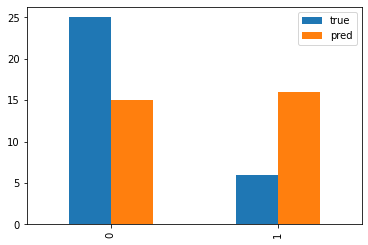

In [ ]:
# Plotting ndp
dff.iloc[:2, -2:].plot(kind='bar')

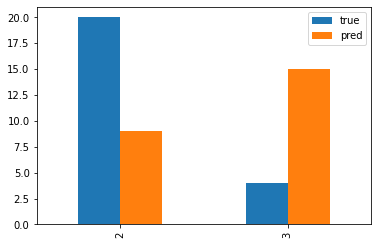

In [ ]:
#plotting liberal
dff.iloc[2:4, -2:].plot(kind='bar')

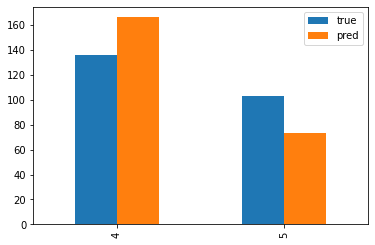

In [ ]:
#plotting conservative
dff.iloc[4:6, -2:].plot(kind='bar')

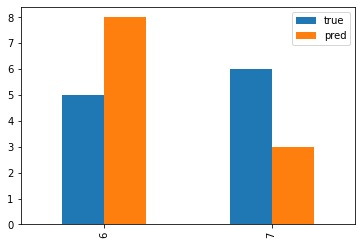

In [ ]:
# plotting NDP
dff.iloc[6:8, -2:].plot(kind='bar')

# **4. Negative Reason Classification**

In [ ]:
elections_df = b.loc[:,["no_spaces" ,"sentiment","negative_reason"]]
elections_df.dropna(inplace=True)
elections_df[elections_df.sentiment == 1]
elections_df.drop("sentiment",axis = 1, inplace = True)


In [ ]:
elections_df.negative_reason.unique()

array(['calling election early', 'covid ', 'others', 'scandal',
       'tell lies', 'gun control', 'economy', 'healthcare and marijuana',
       'segregation', 'women reproductive right and racism',
       'climate problem'], dtype=object)

In [ ]:
elections_df['negative_reason'].replace(['segregation', 'tell lies','scandal','calling election early']
                                    ,["Personal_opinion","Personal_opinion","Personal_opinion","Personal_opinion"],inplace=True)
elections_df['negative_reason'].replace(['covid ', 'healthcare and marijuana']
                                    ,["health_related","health_related"],inplace=True)

In [ ]:
le = preprocessing.LabelEncoder()
elections_df.negative_reason = le.fit_transform(elections_df.negative_reason)

In [ ]:
elections_df.negative_reason.unique()

array([0, 4, 5, 3, 2, 6, 1])

In [ ]:
X = elections_df.loc[:,"no_spaces"]
y = elections_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
vectorizer = TfidfVectorizer(max_features = 5000)
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)
feature_names = vectorizer.get_feature_names()

#dense = vectors_train.todense()
#denselist = dense.tolist()
#X_train = pd.DataFrame(denselist, columns =feature_names )

#dense = vectors_test.todense()
#denselist = dense.tolist()
#X_test = pd.DataFrame(denselist, columns =feature_names )
X_train = vectors_train
X_test = vectors_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y.unique()

array([0, 4, 5, 3, 2, 6, 1])

In [ ]:

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial')

In [ ]:
yhat = model.predict(X_test)

In [ ]:
accuracy_score(y_test, yhat)

0.5213675213675214

In [ ]:
yhat

array([5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 0, 5,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 5, 5, 0, 0,
       0, 0, 5, 0, 5, 5, 0, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 5, 0, 5, 0, 5, 5, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0,
       5, 5, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 0, 0])

In [ ]:
#accuracy of TF-IDF model
def get_reason_accuracy(model, X_train, X_test, y_train, y_test, C, solver):
    
    dic = {'lr':'Logistic Regression',
          'nb':'Naive Bayes',
          'rf':'Random Forest'}
    
    train_acc, test_acc = [], []
    
    if model == 'lr':
        clf = OneVsRestClassifier(LogisticRegression(C=C ,solver=solver,multi_class='ovr'))
    elif model == 'nb':
        clf = OneVsRestClassifier(MultinomialNB(alpha=20))
    elif model == 'rf':
        clf = OneVsRestClassifier(RandomForestClassifier(max_depth=200,min_samples_split=20))
    else:
        print('Model doesn\'t exist')

    clf.fit(X_train, y_train)

    # predict using train data
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    ps = f1_score(y_train, train_pred,average='micro')
    
    # predict using test data
    test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)   
 
    #print("Model: ", dic[model])
    #print("\nTraining accuracy is: {}%".format(round(train_acc*100,2)))
    #print("\nTest accuracy is: {}%".format(round(test_acc*100,2)))
    #print("\nPrecision is:",ps)
    
    return round(train_acc*100,2), round(test_acc*100,2),ps

In [ ]:
train_acc_lr, test_acc_lr, f= get_reason_accuracy('lr',X_train, X_test, y_train, y_test,0.01,'lbfgs')

In [ ]:
f

0.3888888888888889

In [ ]:
#hyperparameter tuning with grid search


best_params = {}
best_accuracy = 0


for C in [0.01,0.1,0.005]:

    for solver in ['lbfgs','newton-cg','liblinear']:

      train_accuracy ,test_accuracy, F1 = get_reason_accuracy('lr',X_train, X_test, y_train, y_test,C,solver)
      print("C= ", C, "| Solver= ", solver, "| F1 score= ", F1)
      if F1 > best_accuracy:

        best_params = {'C':C, 'solver':solver}

        best_accuracy = F1



print (best_params)    

print ("\nThe optimal log model uses C={}, and a {} solver, and has a accuracy of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),))


C=  0.01 | Solver=  lbfgs | F1 score=  0.3888888888888889
C=  0.01 | Solver=  newton-cg | F1 score=  0.3888888888888889
C=  0.01 | Solver=  liblinear | F1 score=  0.3888888888888889
C=  0.1 | Solver=  lbfgs | F1 score=  0.5333333333333333
C=  0.1 | Solver=  newton-cg | F1 score=  0.5333333333333333
C=  0.1 | Solver=  liblinear | F1 score=  0.5740740740740741
C=  0.005 | Solver=  lbfgs | F1 score=  0.3888888888888889
C=  0.005 | Solver=  newton-cg | F1 score=  0.3888888888888889
C=  0.005 | Solver=  liblinear | F1 score=  0.3888888888888889
{'C': 0.1, 'solver': 'liblinear'}

The optimal log model uses C=0.1, and a liblinear solver, and has a accuracy of 0.574%
